In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
sns.set_theme()

Upload the datasets
Quick Dataset Overview

In [3]:
demo=pd.read_csv("C:\\Users\ALIN\Desktop\Python_Alin\EDA project\pandas_project\demographics_de.csv")
print(demo.shape)
demo.head()

(192, 4)


,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736


In [21]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       192 non-null    object
 1   gender      192 non-null    object
 2   age_group   192 non-null    object
 3   population  192 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


In [ ]:
demo.nunique()

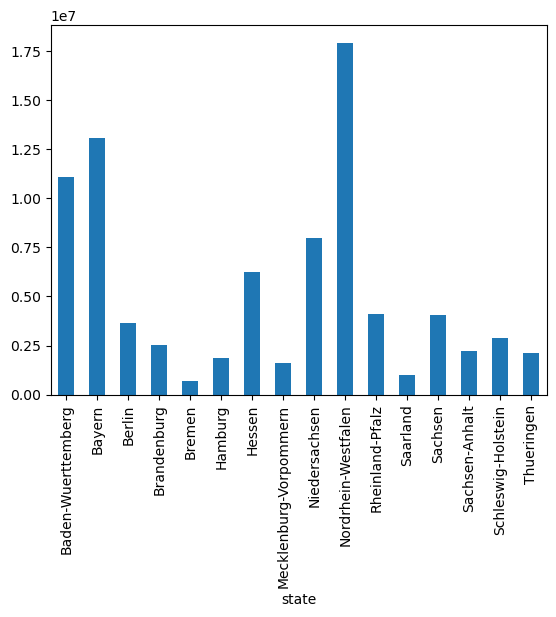

In [4]:
covid=pd.read_csv("C:\\Users\ALIN\Desktop\Python_Alin\EDA project\pandas_project\covid_de.csv",index_col="date")
print(covid.shape)
covid.sample(7)

(2890909, 7)


,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-11-21,Schleswig-Holstein,LK Herzogtum Lauenburg,60-79,F,1,0,1
2020-04-09,Niedersachsen,LK Goettingen,60-79,M,3,0,3
2022-12-30,Bayern,LK Regensburg,05-14,F,1,0,1
2021-09-08,Nordrhein-Westfalen,LK Rhein-Kreis Neuss,05-14,M,15,0,15
2022-09-18,Nordrhein-Westfalen,LK Rhein-Kreis Neuss,35-59,M,9,0,9
2022-05-24,Niedersachsen,LK Leer,80-99,F,1,0,1
2022-02-04,Rheinland-Pfalz,SK Koblenz,00-04,F,2,0,2


In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2890909 entries, 2020-03-27 to 2022-08-24
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   state      object
 1   county     object
 2   age_group  object
 3   gender     object
 4   cases      int64 
 5   deaths     int64 
 6   recovered  int64 
dtypes: int64(3), object(4)
memory usage: 176.4+ MB


2890909

In [ ]:
covid.nunique()

In [ ]:
covid.describe()

In [ ]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = covid.boxplot()
fig.tight_layout()

In [5]:
vaccines=pd.read_csv("C:\\Users\ALIN\Desktop\Python_Alin\EDA project\pandas_project\covid_de_vaccines.csv",index_col="date")
print(vaccines.shape)
vaccines.sample(7)

(771, 8)


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2022-11-11,111346,753,878,137961155,31577080,12802994,64845368,63530614
2022-05-10,82711,2371,4381,133483050,31050011,12801082,64685317,63292121
2022-03-21,94848,4015,8784,129944302,30373701,12796319,64545635,63000779
2021-07-23,538418,123339,414938,67934066,8200383,12505450,51629207,41270889
2021-11-01,61302,12062,16476,88219754,9803311,12775890,58699154,55385303
2022-01-31,232989,21557,47997,123666877,28951012,12791597,64018193,61561408
2021-12-29,700372,64948,72666,113998884,22939400,12785023,62704117,59099325


In [ ]:
vaccines.info()

In [ ]:
vaccines.nunique()

In [ ]:
vaccines.hist(figsize=(10,7))
plt.tight_layout()
plt.show()

In [ ]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = vaccines.boxplot()
fig.tight_layout()
# astrazeneca_cumul & persons_first_cumul have outliers

## Identify Missing Data

In [6]:
print(demo.isnull().sum())
print(covid.isnull().sum())
print(vaccines.isnull().sum())

state         0
gender        0
age_group     0
population    0
dtype: int64
state             0
county            0
age_group     13876
gender       125625
cases             0
deaths            0
recovered         0
dtype: int64
doses                  0
doses_first            0
doses_second           0
pfizer_cumul           0
moderna_cumul          0
astrazeneca_cumul      0
persons_first_cumul    0
persons_full_cumul     0
dtype: int64


In [7]:
#rows that miss both age_group and gender
covid[covid.age_group.isnull() &covid.gender.isnull()]

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2022-02-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,NaN,NaN,1,0,1
2022-01-19,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-20,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-25,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-31,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...
2021-03-24,Thueringen,LK Sonneberg,NaN,NaN,2,0,2
2021-11-24,Thueringen,LK Unstrut-Hainich-Kreis,NaN,NaN,1,0,1
2022-12-20,Thueringen,SK Jena,NaN,NaN,1,0,1


In [14]:
#Percentage of missing age data out of all

print(f'In age_group {len(covid[covid.age_group.isnull()])*100/len(covid)}% of values are missing')

In age_group 0.47998743647759234% of values are missing


In [15]:
#Percentage of missing gender data out of all
print(f'In gender {len(covid[covid.gender.isnull()])*100/len(covid)}% of values are missing')

In gender 4.34551900457607% of values are missing


## Demographic parameters

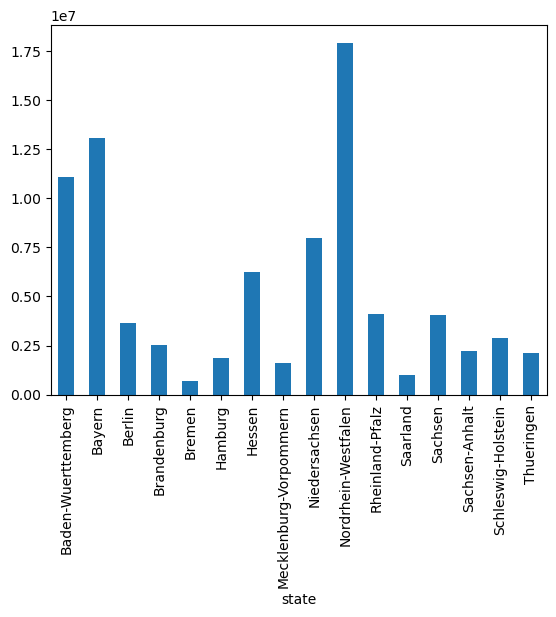

In [49]:
#population by state
demo.groupby('state')['population'].sum().plot.bar()
plt.show()

<AxesSubplot:xlabel='state'>

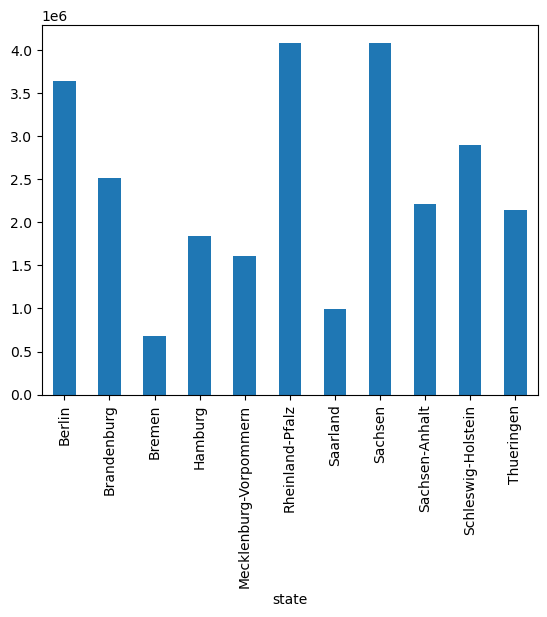

In [56]:
#divide the states to small and large by population
small=demo.groupby('state').filter(lambda grp:grp['population'].sum()<5000000)
large=demo.groupby('state').filter(lambda grp:grp['population'].sum()>5000000)
small.groupby('state')['population'].sum().plot.bar()

<AxesSubplot:xlabel='state'>

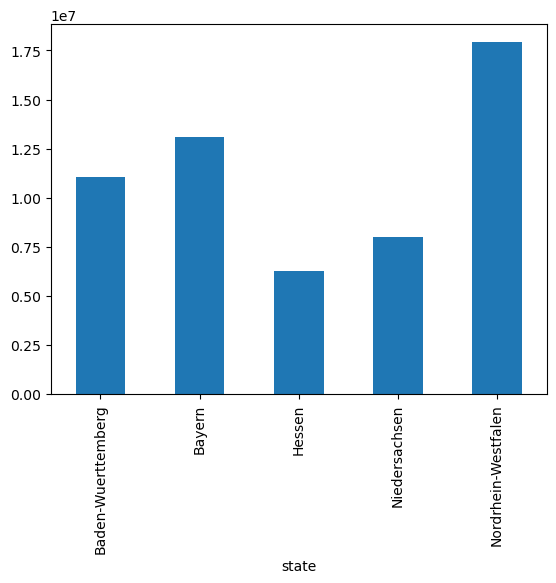

In [57]:
large.groupby('state')['population'].sum().plot.bar()

<AxesSubplot:xlabel='state'>

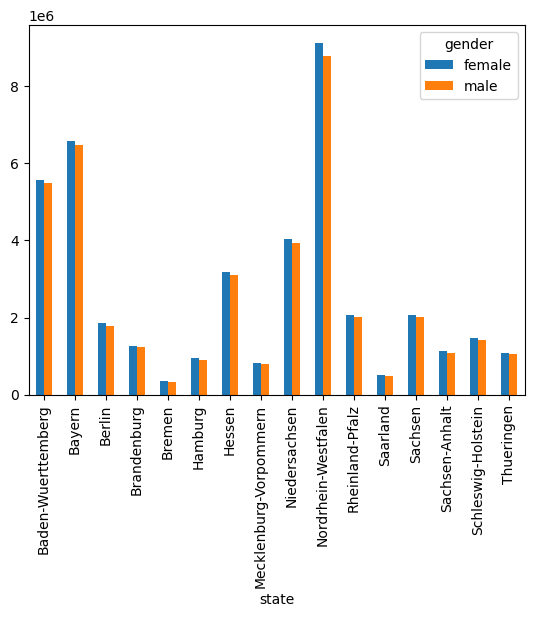

In [18]:
#number of male/ female by state
demo.pivot_table(index='state', columns='gender',values='population', aggfunc='sum').plot.bar()

<AxesSubplot:xlabel='state'>

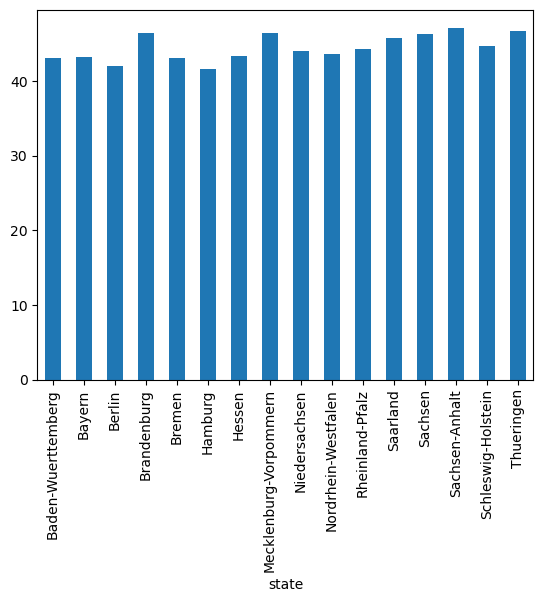

In [46]:

#avg age by state
demo_age=demo[['state','age_group','population']]
demo_age=demo_age.replace({'00-04':2, '05-14':9.5, '15-34':24.5, '35-59':47, '60-79':69.5, '80-99':89.5})

demo_age['a_pop']=demo_age['age_group']*demo_age['population']
total=demo.groupby('state')['population'].sum()


ave=demo_age.groupby('state')['a_pop'].sum()/total
ave.plot.bar()
# no significant difference

<AxesSubplot:xlabel='state'>

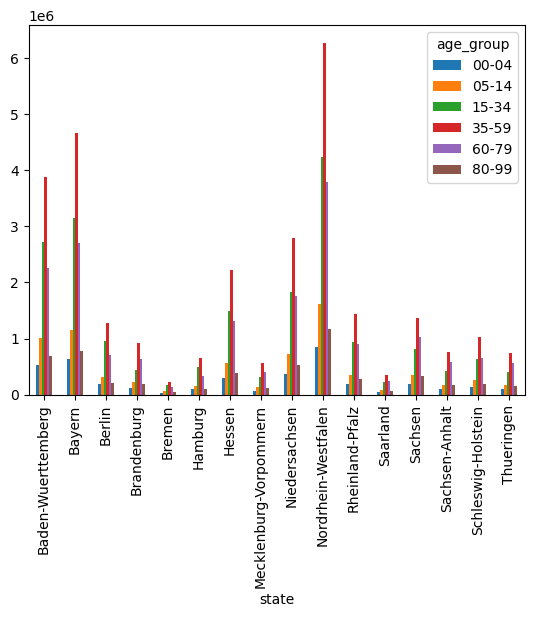

In [48]:
#Age representation per state
#demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar()
demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar()